### Regresión

In [952]:
import pandas as pd
import numpy as np

In [953]:
data = pd.read_csv('../notebookJupyter/Factory_Salary.csv')
df = pd.DataFrame(data, columns=data.columns)
df.shape

(264, 7)

In [954]:
df = pd.read_csv('../notebookJupyter/Factory_Salary.csv')
df.head(80)


,Date,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,2009-01-01,Metal heater,7,Heating furnaces,22,580,26020.000000
1,2009-01-01,Metal heater,6,Heating furnaces,22,580,22980.000000
2,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.000000
3,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.000000
4,2009-01-01,Metal heater,4,Heating furnaces,22,580,18090.000000
...,...,...,...,...,...,...,...
75,2009-04-01,Cleaner,3,Pilgrim mill,18,1200,17927.647059
76,2009-04-01,Roller,5,Sizing mill,18,1200,23004.411765
77,2009-04-01,Operator,5,Sizing mill,8,1200,21204.411765
78,2009-04-01,Operator,5,Sizing mill,8,1200,21204.411765


In [955]:
df['Rank'].unique()

array([7, 6, 5, 4, 3], dtype=int64)

In [956]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             264 non-null    object 
 1   Profession       264 non-null    object 
 2   Rank             264 non-null    int64  
 3   Equipment        264 non-null    object 
 4   Insalubrity      264 non-null    int64  
 5   Size_Production  264 non-null    int64  
 6   Salary           264 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 14.6+ KB


In [957]:
df.isnull().sum()

Date               0
Profession         0
Rank               0
Equipment          0
Insalubrity        0
Size_Production    0
Salary             0
dtype: int64

#### Generar valores falntantes en el data set con la tecnica imputacion aleatoria

In [958]:
# Generar 5 valores faltantes en las columnas existentes del data set original
missing_values = 5

# Generar valores faltantes en la primera columna existente Rank
missing_indices = np.random.choice(df.index, size=missing_values, replace=False)
df.loc[missing_indices, 'Rank'] = np.nan

# Generar valores faltantes en la segunda columna existente Sise_Production
missing_indices = np.random.choice(df.index, size=missing_values, replace=False)
df.loc[missing_indices, 'Size_Production'] = np.nan

# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv("Factory_Salary2.csv", index=False)


In [959]:
# Cargar el archivo CSV con valores faltantes en un nuevo DataFrame
df2 = pd.read_csv("Factory_Salary2.csv")

# Mostrar los valores faltantes en el DataFrame
valores_faltantes = df2.isnull().sum()
print(valores_faltantes)

Date               0
Profession         0
Rank               5
Equipment          0
Insalubrity        0
Size_Production    5
Salary             0
dtype: int64


#### Tratamiento de valores faltantes

In [960]:
df2.head(70)

,Date,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,2009-01-01,Metal heater,7.0,Heating furnaces,22,580.0,26020.000000
1,2009-01-01,Metal heater,6.0,Heating furnaces,22,580.0,22980.000000
2,2009-01-01,Metal heater,5.0,Heating furnaces,22,580.0,20350.000000
3,2009-01-01,Metal heater,5.0,Heating furnaces,22,580.0,20350.000000
4,2009-01-01,Metal heater,4.0,Heating furnaces,22,580.0,18090.000000
...,...,...,...,...,...,...,...
65,2009-04-01,Metal planter,4.0,Heating furnaces,22,1200.0,20999.117647
66,2009-04-01,Refractory,4.0,Heating furnaces,11,1200.0,19019.117647
67,2009-04-01,Roller,7.0,Piercing mill,18,1200.0,29841.764706
68,2009-04-01,Roller,6.0,Piercing mill,18,1200.0,26175.882353


In [961]:
df2['Rank'].value_counts()

Rank
4.0    83
5.0    59
7.0    46
3.0    36
6.0    35
Name: count, dtype: int64

In [962]:
#mediana datos de Rank
df2['Rank'].median()

5.0

In [963]:
#rellenar con la mediana los datos faltantes
df2['Rank'].fillna(df2['Rank'].median())

0      7.0
1      6.0
2      5.0
3      5.0
4      4.0
      ... 
259    7.0
260    7.0
261    7.0
262    7.0
263    7.0
Name: Rank, Length: 264, dtype: float64

In [964]:
#modificar el data set ya con los datos rellenos
df2['Rank']= df2['Rank'].fillna(df2['Rank'].median())

In [965]:
df2.isnull().sum()

Date               0
Profession         0
Rank               0
Equipment          0
Insalubrity        0
Size_Production    5
Salary             0
dtype: int64

In [966]:
df2['Size_Production'].value_counts()

Size_Production
580.0     22
790.0     22
1200.0    22
1250.0    22
950.0     22
1400.0    22
1180.0    22
1020.0    22
820.0     21
1080.0    21
780.0     21
810.0     20
Name: count, dtype: int64

In [967]:
#mediana  datos Size_Production
df2['Size_Production'].median()

1020.0

In [968]:
#rellenar con la mediana los datos faltantes
df2['Size_Production'].fillna(df2['Size_Production'].median())

0       580.0
1       580.0
2       580.0
3       580.0
4       580.0
        ...  
259    1180.0
260    1080.0
261     780.0
262    1020.0
263     810.0
Name: Size_Production, Length: 264, dtype: float64

In [969]:
#modificar el data set ya con los datos rellenos
df2['Size_Production']= df2['Size_Production'].fillna(df2['Size_Production'].median())

In [970]:
df2.isnull().sum()

Date               0
Profession         0
Rank               0
Equipment          0
Insalubrity        0
Size_Production    0
Salary             0
dtype: int64

#### Conversion de valores de Texto a numericos

In [971]:
df2['Date'].unique()

array(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
       '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
       '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01'],
      dtype=object)

In [972]:
df2['Profession'].unique()

array(['Metal heater', 'Metal planter', 'Refractory', 'Roller',
       'Roller assistant', 'Hot metal cutter', 'Cleaner', 'Operator',
       'Quality controller'], dtype=object)

In [973]:
df2['Equipment'].unique()

array(['Heating furnaces', 'Piercing mill', 'Pilgrim mill', 'Sizing mill',
       'Auxiliary premises', 'Control and measuring equipment'],
      dtype=object)

In [974]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df2['Date'] = encoder.fit_transform(df2[['Date']])
df2['Profession'] = encoder.fit_transform(df2[['Profession']])
df2['Equipment'] = encoder.fit_transform(df2[['Equipment']])

In [975]:
df2.head(5)

,Date,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,0.0,2.0,7.0,2.0,22,580.0,26020.0
1,0.0,2.0,6.0,2.0,22,580.0,22980.0
2,0.0,2.0,5.0,2.0,22,580.0,20350.0
3,0.0,2.0,5.0,2.0,22,580.0,20350.0
4,0.0,2.0,4.0,2.0,22,580.0,18090.0


#### Selecion de variables 'X' y 'y'

In [976]:
X = df2.drop(['Salary'], axis =1) 
X.head(3)

,Date,Profession,Rank,Equipment,Insalubrity,Size_Production
0,0.0,2.0,7.0,2.0,22,580.0
1,0.0,2.0,6.0,2.0,22,580.0
2,0.0,2.0,5.0,2.0,22,580.0


In [977]:
y = df2['Salary']
y

0      26020.000000
1      22980.000000
2      20350.000000
3      20350.000000
4      18090.000000
           ...     
259    26342.235294
260    25044.588235
261    22060.000000
262    24266.000000
263    22060.000000
Name: Salary, Length: 264, dtype: float64

#### Escalado o Normalizacion

In [978]:
#Escalado de datos con MinMaxScaler
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler() 

#X['Date']= scaler.fit_transform(X[['Date']])
#X['Profession']= scaler.fit_transform(X[['Profession']])
#X['Rank']= scaler.fit_transform(X[['Rank']])
#X['Equipment']= scaler.fit_transform(X[['Equipment']])
#X['Insalubrity']= scaler.fit_transform(X[['Insalubrity']])
#X['Size_Production']= scaler.fit_transform(X[['Size_Production']])

#X.head(5)

#### Entrenamento de modelo Random Forest (bosques aleatorios)

In [979]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df2.drop('Salary',axis=1)
y = df2['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

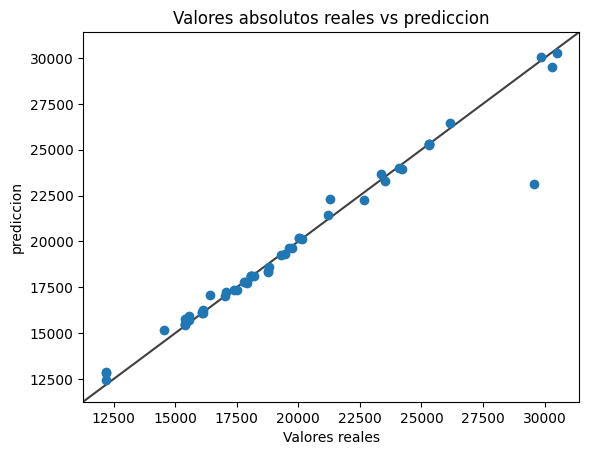

In [980]:
import matplotlib.pyplot as plt 

#Crear el diagrama de dispersion
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('prediccion')
plt.title('Valores absolutos reales vs prediccion')

#Añadir una linea de identidad que representa una prediccion perfecta
lims=[np.min([plt.xlim(),plt.ylim()]), np.max([plt.xlim(),plt.ylim()])]
plt.plot(lims,lims,'k-',alpha=0.75,zorder=0)
plt.xlim(lims)
plt.ylim(lims)

plt.show

In [981]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf_modelo = RandomForestRegressor(random_state=None)
scores = cross_val_score(rf_modelo,X,y,cv=5,n_jobs=-1)

print("Validacion cruzada para cada fold:",scores)

Validacion cruzada para cada fold: [0.99032819 0.98689731 0.89774573 0.94854779 0.70579284]


#### Metrica r2 con k-fold-cross-validation

In [982]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
scor='r2'
scores=cross_val_score(rf_modelo,X,y,cv=5,scoring=scor)

print("Coeficiente de terminacion R^2 : ", scores.mean())

Coeficiente de terminacion R^2 :  0.9031719248304064


In [983]:
from sklearn.metrics import mean_squared_error

#calcula el error cuadratico medio (MSE)
mse= mean_squared_error(y_test,y_pred)
#Imprimiendo el MSE
print("Error cuadratico medio:", mse)

#Calcula la raiz del error cuadratico medio
rmse = np.sqrt(mse)
#imprimiendo el RMSE
print("Raiz del error cuadratico medio:", rmse)

log_rmse = np.log(rmse)
print("Logaritmo de la raiz del error cuadratico medio (log RMSE):", log_rmse)

Error cuadratico medio: 880085.5674827857
Raiz del error cuadratico medio: 938.1287584776334
Logaritmo de la raiz del error cuadratico medio (log RMSE): 6.843887208751595


#### Entrenamiento de modelos  redes neuronales (Neural Network NN)  con Tensor flow

In [899]:
from sklearn.neural_network import MLPRegressor
modeloMLPRegressor = MLPRegressor(hidden_layer_sizes = (80,50,120,150),
                      max_iter=2000, 
                      activation = 'identity',
                      solver = 'lbfgs')
modeloMLPRegressor.fit(X_train,y_train)

MLPRegressor(activation='identity', hidden_layer_sizes=(80, 50, 120, 150),
             max_iter=2000, solver='lbfgs')

In [900]:
modeloMLPRegressor.score(X_test,y_test)

0.9603690229472459

In [901]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modeloMLPRegressor, X, y,scoring= 'r2',cv=5,n_jobs=-1)
scores.mean()

0.943228829862052

### Clasificación

In [902]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR

In [903]:
data = pd.read_csv('../notebookJupyter/cereals.csv')
df = pd.DataFrame(data, columns=data.columns)
df.shape

(77, 23)

In [904]:
#data set de cereales de diferente marcas y su informacion nutricional
df = pd.read_csv('../notebookJupyter/cereals.csv')
df.head(5)

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,...,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,...,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,...,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,...,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.384843,1,0,0,0,0,1,0


In [905]:
#informacion de la tabla
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          77 non-null     object 
 1   Manuf         77 non-null     object 
 2   Type          77 non-null     object 
 3   Calories      77 non-null     int64  
 4   Protein       77 non-null     int64  
 5   Fat           77 non-null     int64  
 6   Sodium        77 non-null     int64  
 7   Fiber         77 non-null     float64
 8   Carbo         76 non-null     float64
 9   Sugars        76 non-null     float64
 10  Potass        75 non-null     float64
 11  Vitamins      77 non-null     int64  
 12  Shelf         77 non-null     int64  
 13  Weight        77 non-null     float64
 14  Cups          77 non-null     float64
 15  Rating        77 non-null     float64
 16  Cold          77 non-null     int64  
 17  Nabisco       77 non-null     int64  
 18  Quaker        77 non-null     in

In [906]:
#datos que contiene la columna Manuf
df['Manuf'].value_counts()

Manuf
K     23
G     22
P      9
Q      8
R      8
N      6
A      1
Name: count, dtype: int64

In [907]:
#Verificacion de valores faltantes ,se encontro en la columna carbohidratos,azucares y potasio
df.isnull().sum()

Name            0
Manuf           0
Type            0
Calories        0
Protein         0
Fat             0
Sodium          0
Fiber           0
Carbo           1
Sugars          1
Potass          2
Vitamins        0
Shelf           0
Weight          0
Cups            0
Rating          0
Cold            0
Nabisco         0
Quaker          0
Kelloggs        0
GeneralMills    0
Ralston         0
AHFP            0
dtype: int64

In [908]:
#Contar los valores de carbohidratos
df['Carbo'].value_counts()

Carbo
13.0    8
15.0    8
21.0    7
12.0    7
16.0    7
14.0    7
17.0    6
11.0    5
18.0    3
20.0    3
10.5    2
8.0     2
22.0    2
10.0    2
13.5    1
19.0    1
23.0    1
5.0     1
11.5    1
7.0     1
9.0     1
Name: count, dtype: int64

In [909]:
#mediana  datos de los carbohidratos
df['Carbo'].median()

14.5

In [910]:
#rellenar con la mediana los datos faltantes
df['Carbo'].fillna(df['Carbo'].median())

0      5.0
1      8.0
2      7.0
3      8.0
4     14.0
      ... 
72    21.0
73    13.0
74    17.0
75    17.0
76    16.0
Name: Carbo, Length: 77, dtype: float64

In [911]:
#modificar el data set ya con los datos rellenos
df['Carbo']= df['Carbo'].fillna(df['Carbo'].median())

In [912]:
#Contar los valores de carbohidratos
df['Sugars'].value_counts()

Sugars
3.0     13
6.0      7
0.0      7
12.0     7
8.0      5
5.0      5
10.0     5
11.0     5
9.0      4
7.0      4
13.0     4
14.0     3
2.0      3
15.0     2
1.0      1
4.0      1
Name: count, dtype: int64

In [913]:
#mediana de los azucares
df['Sugars'].median()

7.0

In [914]:
#rellenar promedio
df['Sugars'].fillna(df['Sugars'].median())

0      6.0
1      8.0
2      5.0
3      0.0
4      8.0
      ... 
72     3.0
73    12.0
74     3.0
75     3.0
76     8.0
Name: Sugars, Length: 77, dtype: float64

In [915]:
#modificar el data set ya con los datos rellenos
df['Sugars']= df['Sugars'].fillna(df['Sugars'].median())

In [916]:
#Contar los valores de carbohidratos
df['Potass'].value_counts()

Potass
90.0     5
110.0    5
35.0     5
95.0     4
40.0     4
25.0     4
45.0     4
30.0     4
100.0    3
60.0     3
55.0     3
120.0    3
190.0    2
105.0    2
160.0    2
170.0    2
140.0    2
240.0    1
50.0     1
15.0     1
260.0    1
130.0    1
230.0    1
280.0    1
85.0     1
200.0    1
80.0     1
135.0    1
65.0     1
20.0     1
125.0    1
70.0     1
330.0    1
320.0    1
115.0    1
Name: count, dtype: int64

In [917]:
#mediana  datos del potasio
df['Potass'].mean()

98.66666666666667

In [918]:
#rellenar promedio
df['Potass'].fillna(df['Potass'].mean())

0     280.000000
1     135.000000
2     320.000000
3     330.000000
4      98.666667
         ...    
72     60.000000
73     25.000000
74    115.000000
75    110.000000
76     60.000000
Name: Potass, Length: 77, dtype: float64

In [919]:
#modificar el data set ya con los datos rellenos
df['Potass']= df['Potass'].fillna(df['Potass'].median())

In [920]:
df.isnull().sum()

Name            0
Manuf           0
Type            0
Calories        0
Protein         0
Fat             0
Sodium          0
Fiber           0
Carbo           0
Sugars          0
Potass          0
Vitamins        0
Shelf           0
Weight          0
Cups            0
Rating          0
Cold            0
Nabisco         0
Quaker          0
Kelloggs        0
GeneralMills    0
Ralston         0
AHFP            0
dtype: int64

In [921]:
df.drop(['Name','Cups','Cold','Rating','Nabisco','Quaker','Kelloggs','GeneralMills','Ralston'],axis=1,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Manuf     77 non-null     object 
 1   Type      77 non-null     object 
 2   Calories  77 non-null     int64  
 3   Protein   77 non-null     int64  
 4   Fat       77 non-null     int64  
 5   Sodium    77 non-null     int64  
 6   Fiber     77 non-null     float64
 7   Carbo     77 non-null     float64
 8   Sugars    77 non-null     float64
 9   Potass    77 non-null     float64
 10  Vitamins  77 non-null     int64  
 11  Shelf     77 non-null     int64  
 12  Weight    77 non-null     float64
 13  AHFP      77 non-null     int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 8.6+ KB


In [922]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['Manuf'] = encoder.fit_transform(df[['Manuf']])
df['Type'] = encoder.fit_transform(df[['Type']])
df.head(4)

,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,AHFP
0,3.0,0.0,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0
1,5.0,0.0,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,0
2,2.0,0.0,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0
3,2.0,0.0,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0


In [923]:
#Escalado de datos con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

df['Fiber']= scaler.fit_transform(df[['Fiber']])
df['Calories']= scaler.fit_transform(df[['Calories']])
df['Protein']= scaler.fit_transform(df[['Protein']])
df['Fat']= scaler.fit_transform(df[['Fat']])
df['Sodium']= scaler.fit_transform(df[['Sodium']])
df['Carbo']= scaler.fit_transform(df[['Carbo']])
df['Sugars']= scaler.fit_transform(df[['Sugars']])
df['Potass'] = scaler.fit_transform(df[['Potass']])
df['Vitamins']= scaler.fit_transform(df[['Vitamins']])
df['Shelf']= scaler.fit_transform(df[['Shelf']])
df['AHFP']= scaler.fit_transform(df[['AHFP']])
df.head(5)

,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,AHFP
0,3.0,0.0,0.181818,0.6,0.2,0.406250,0.714286,0.000000,0.400000,0.841270,0.25,1.0,1.0,0.0
1,5.0,0.0,0.636364,0.4,1.0,0.046875,0.142857,0.166667,0.533333,0.380952,0.00,1.0,1.0,0.0
2,2.0,0.0,0.181818,0.6,0.2,0.812500,0.642857,0.111111,0.333333,0.968254,0.25,1.0,1.0,0.0
3,2.0,0.0,0.000000,0.6,0.0,0.437500,1.000000,0.166667,0.000000,1.000000,0.25,1.0,1.0,0.0
4,6.0,0.0,0.545455,0.2,0.4,0.625000,0.071429,0.500000,0.533333,0.238095,0.25,1.0,1.0,0.0


#### Selecion de variables de 'X' y 'y'

In [924]:
x = df.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13]]
x.head(5)

,Manuf,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,AHFP
0,3.0,0.181818,0.6,0.2,0.406250,0.714286,0.000000,0.400000,0.841270,0.25,1.0,1.0,0.0
1,5.0,0.636364,0.4,1.0,0.046875,0.142857,0.166667,0.533333,0.380952,0.00,1.0,1.0,0.0
2,2.0,0.181818,0.6,0.2,0.812500,0.642857,0.111111,0.333333,0.968254,0.25,1.0,1.0,0.0
3,2.0,0.000000,0.6,0.0,0.437500,1.000000,0.166667,0.000000,1.000000,0.25,1.0,1.0,0.0
4,6.0,0.545455,0.2,0.4,0.625000,0.071429,0.500000,0.533333,0.238095,0.25,1.0,1.0,0.0


In [925]:
y=df['Type']
y

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
72    0.0
73    0.0
74    0.0
75    0.0
76    0.0
Name: Type, Length: 77, dtype: float64

In [926]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_x = scaler.fit_transform(X)
X = pd.DataFrame(scaled_x, columns=X.columns)
X.head(5)

,Date,Profession,Rank,Equipment,Insalubrity,Size_Production
0,-1.593255,-0.884538,1.639844,-0.791257,0.947245,-1.767691
1,-1.593255,-0.884538,0.864004,-0.791257,0.947245,-1.767691
2,-1.593255,-0.884538,0.088164,-0.791257,0.947245,-1.767691
3,-1.593255,-0.884538,0.088164,-0.791257,0.947245,-1.767691
4,-1.593255,-0.884538,-0.687676,-0.791257,0.947245,-1.767691


#### Modelo con Random Forest (Bosques aleatorios)

In [927]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(random_state=0)

scores = cross_val_score(modelo, x, y,scoring="accuracy",cv=5, n_jobs=-1)
print(scores)
print(np.mean(scores))

C:\Users\Usuario1\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[0.9375     0.9375     1.         1.         0.93333333]
0.9616666666666667


In [928]:
x_train, x_test, y_train, y_test = tts(x,y, test_size=0.2)
arbol_c =modelo.fit(x_train,y_train)
y_pred= modelo.predict(x_test)
accuracy_score(y_test,y_pred)

0.9375

In [929]:
C=confusion_matrix(y_pred, y_test)
print(C)

[[15  1]
 [ 0  0]]


In [930]:
# Redes neuronales TensorFlow

In [940]:
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np


model = Sequential()
model.add(Dense(units=74, input_dim=13, activation="relu"))
model.add(Dense(units=50, activation="relu"))
model.add(Dense(units=5, activation="softmax"))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 74)                1036      
                                                                 
 dense_127 (Dense)           (None, 50)                3750      
                                                                 
 dense_128 (Dense)           (None, 5)                 255       
                                                                 
Total params: 5,041
Trainable params: 5,041
Non-trainable params: 0
_________________________________________________________________


In [944]:
acc = []

# Realiza la validación cruzada utilizando train_test_split
for contador in range(0, 5):
    x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2)

    # Entrena el modelo en los datos de entrenamiento
    historial = model.fit(x_train, y_train, epochs=300, verbose=False)

    y_pred = model.predict(x_test)
    res = np.argmax(y_pred, axis=1)
    r =  accuracy_score(y_test, res)
    acc.append(r)


# Imprimir los resultados
print("Puntajes de precisión en cada pliegue:", acc)
print('Promedio: ', np.mean(acc))


1/1 [==============================] - 0s 47ms/step
Puntajes de precisión en cada pliegue: [0.875, 1.0, 1.0, 1.0, 1.0]
Promedio:  0.975


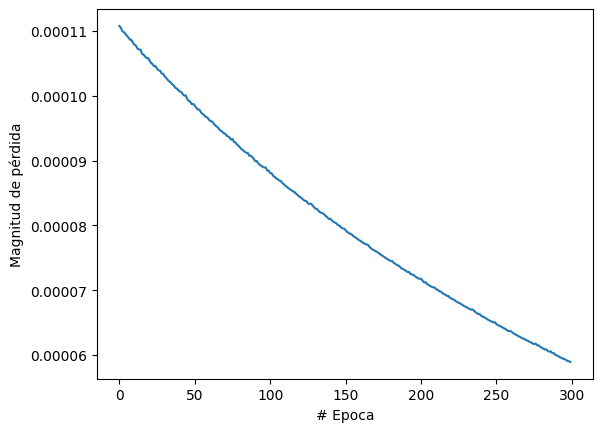

In [945]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [947]:
from sklearn.metrics import confusion_matrix
C=confusion_matrix(res, y_test)
print(C)

[[15  0]
 [ 0  1]]
